<a href="https://www.kaggle.com/code/iamarunkumar/1-logistic-regression?scriptVersionId=178351814" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Classification

This is a supervised machine learning algorithm and used to predict the category. Unlike regression models that predicts the continous numbers, classification models are used to predict or identify the category of new observations based on training data.

There are a variety of applications from medicine to marketing to business. For instance, if we have a customer of business and if we would like to predict which customers are likely to stay and which ones going to leave. This is also called **churn modeling.**

Another application is email. If we get an email it can be classified as normal mail or classified as important or classified as promotions and put in different folder or classified as spam. Another instance is image recognition where a set of dogs and cats images are given and the model will exactly classify the dogs and cats image separatly.

There are 7 different types of classification type of algorithms. They are.

    1. Logistic Regression
    
    2. SVM
    
    3. K-nearest neighbour
    
    4. Kernel SVM
    
    5. Naive Bayes
    
    6. Decision Tree Classification
    
    7. Random Forest Classification
    
Of which, logistic and SVMs are linear model and the rest are non-linear models.

# Logistic Regression Intuition

It is used to predict the categorical dependent variable from a number of independent variables. For instance, if we are working for an insurnace company and want to predict if someone want to purchase the health insurance that the company is offering. And the **prediction is just YES or NO**. It's just the categorical variable with yes or no. We predict the dependent variable based on some independent variables such as age.

So, on x-axis is age and y-axis is yes/no(did they take up the health insurance or not) binary values. Let's say x-axis is between 18 and 60 yrs of age. For illustration we draw an horizontal line somewhere on y-axis. Now, we have some datasets plotted on x-axis who didn't purchase and some data points on y-axis who purchased. 

Now, if we draw a curve, it's kind of 'S' shaped and is called as **Sigmoid curve**. Now, we have 2 new observations **some with age 35 and the other with age 45** and if we apply this logistic regression algorithm by projecting these values, and everything here is between zero and one. Here, no is zero and yes is one. And in between is the probabilities. we get the probability of **42% for 35 yrs prediction and 81% for 45 yrs of prediction**. This is the p-value that we see in below equation. For most situations, we need a binary outcome just yes or no. And in that situation, we draw a line at 50% that divides the plot into two. Say, anything above 50% will be projected as yes (binary value 1) and go with the health insurance and anything below 50% (binary value 0), wouldn't go (no).

The equation of logistic regression is,

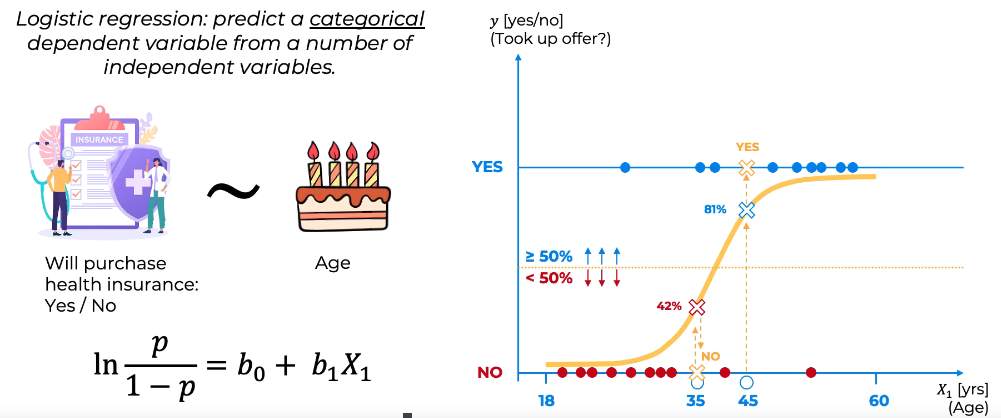

where p is the probability.

We may also have many other independent variables along with age such as income, level of education, family/single etc..

# Maximum Likelihood

So, we have got the logistic regression plotted for a chart consisting of data points that are described above. Now, how do we know the curve that we received is the best fit for our data. Just like linear regression, we would have multiple regression curve here as well and choosing the best one is the key point. It means, we have data points plotted on 'No'(x-axis) and on yes (horizontal line). Now, **how to calculate the likelihood**.

**Answer** Let's consider 'yes' first. What if the logistic regression would have plotted for the data points on horizontal line (yes) if we don't know the customer had agreed for health insurance. If we draw a line that cuts the data point on sigmoid curve and if suppose that falls on the value 0.03(3%) and another datapoint on sigmoid curve value 0.07(7%) and another datapoint on 0.54(54%) and another on 0.86(86%) and another on 0.94(94%). 

Let's park these values a little aside and notedown the customers on 'NO's. The values **on NO axis(x-axis)** are 0.01(1%), 0.04(4%), 0.10(10%), 0.58(58%), 0.96(96%). Again all these values that are fallen on NO axis are the customer who told yes (take health insurance). So there are very least chance of taking health insurance for people saying yes of 1%, 4%, 10%. If we want calculate 'NO' probability, then it's just 1-0.01=0.99 (99%) chance of saying no to health insurance. Sameway for 1-0.04=0.96(96%) no to health insurance. Similarly, 1-0.10=90% and then 1-0.58=0.42 and then 1-0.96=0.04 saying no actually.

**Time to calculate likelihood** ==> just multiply all values of both yes and no.

0.03*0.07*0.54*0.86*0.94*(1-0.01)*(1-0.04)*(1-0.10)*(1-0.58)*(1-0.96) = **0.00019939**

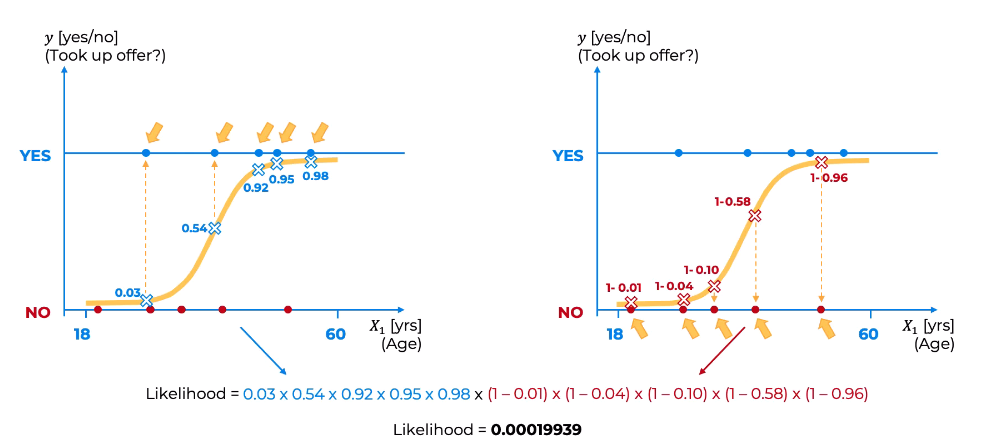

**How to calculate maximum likelihood** - The way to find the best fitting curve is, we look through all possible logistic curves. In fact, we compare what's the likelihood are of different curves. So, if we have logistic modelling one type of curve and have the likelihood of **0.00007418** and another with **0.0001287** and another with **0.0001384** and another with **0.00019939**

Then the maximum likelihood is **0.00019939** since this is the largest value when compared to others.

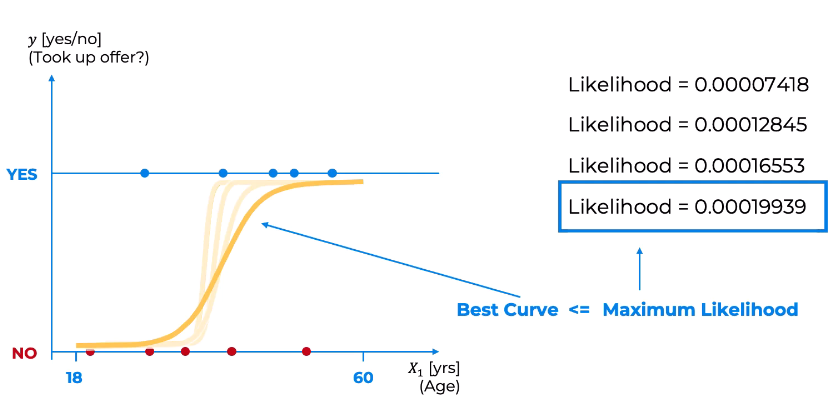
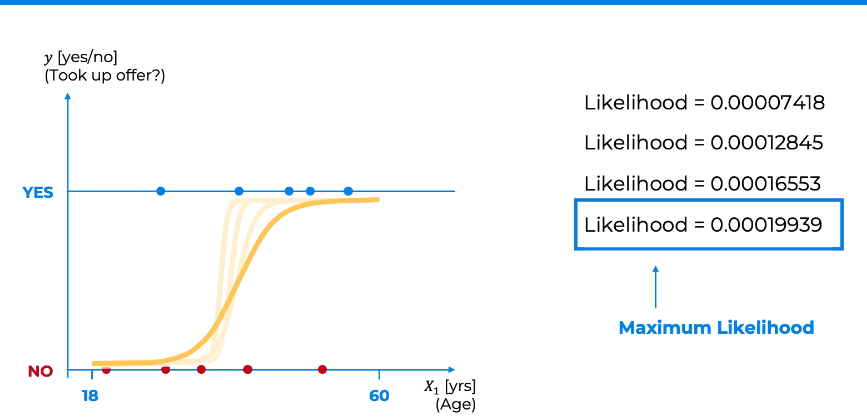

Let's start implementing the logistic regression.

# Importing required libraries

In [ ]:
# Let's import the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing datasets

In [ ]:
# Let's import the dataset
df = pd.read_csv('/kaggle/input/social-network-ads/Social_Network_Ads.csv')
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

# Taking care of missing values

In [ ]:
# Let's import the SimpleImputer class from impute module of sklearn library
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='median')
imputer.fit_transform(X,y)

# Splitting the dataset into training set and test set

In [ ]:
# Let's import the train_test_split function from model_selection class of sklearn library

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# Feature Scaling

In [ ]:
# Before, feature scaling, let's reshape the dependent variable vector y.

# y = y.reshape(len(y),1)

# Let's import StandardScaler class from preprocessing module of sklearn library

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Training the Logistic Regression on the Training model

In [ ]:
# Let's import the LogisticRegression class from linear_model module of sklearn library

from sklearn.linear_model import LogisticRegression

# since, it's classification technique, we will call the object as classifier and build the log.regression model

classifier = LogisticRegression(random_state=0)

# Let's now train the log.regression model

classifier.fit(X_train,y_train)

# Predicting a new result

In [ ]:
"""Now, let's try to predict just the first row of X_train (customer having age=30 and income=80,000 dollar). Remember
for predict just one row, we always need to use double pair of brackets. Here, since we have two columns(matrix of
features, we will pass those each values directly with comma seperated.)

Also, we need to scale the values before we pass it to predict() because we had trained the model with scaling. So, we
need to scale before predicting. use transform() to scale the values.

Final output should correctly give the decision of 0 as we have the same in our X_test. This predict() will give the
decision of 0 or 1"""

print(classifier.predict(sc.transform([[30,87000]])))

# Predicting the test set results

In [ ]:
"""Let's now try to implement the predict() for the whole test set.
Also, our aim is to view the predictions along with the original data in X_test. So, let's use the same methodology from
regression type of using concatenate() and reshape() to view both predicted result and actual result simultaneously. Since
the results are just binary values as 0 and 1, we don't need to useset_printoptions() to give the precision of 2 digits
after decimal"""

y_pred = classifier.predict(sc.transform(X_test))
#np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

# Making the Confusion Matrix

It is by the way finding the accuracy. Accuracy in test set is simply the no. of correct predictions/total no. of observations in the test set. 

Confusion matrix will exactly show us the no. of correct predictions and the no. of incorrect
predictions for the two cases 0 or 1. This is simply showing how many mistakes and correct predictions our model made.

In [ ]:
"""Confusion matrix is a simple 2D matrix with simple 2 rows and 2 columns which will show us the no. of correct
predictions we did in both case and how many incorrect predictions in both cases of 0 and 1.

We will import the confusion_matrix function from metrics module of sklearn library to see the correct and incorrect
predictions.

We will also import the accuracy_score function to find the accuracy or the percentage of our predictions in our testset"""

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

"""If you see the output, the first row of first column (52) is the actual or correct prediction of 0. It means the model
correctly predicted it as 0. 52 customers didn't buy the SUV and our model predicted it accurately.

the last value-second row of second column (19) is the actual or correct predictions of 1. It means, the model
correctly predicted it as 1. 19 customers didn't buy the SUV and our model predicted it accurately.

The first row of second column(6) is the incorrect prediction of our model where actually it was 1 but our model predicted
it as 0. It means, the customer actually bought SUV but model predicted it as the customers didn't buy SUV.

Finally the second row of first column(3) actually didn't buy SUV but our model predicted as customers bought it. It was
actually 0 but model predicted it as 1.

Finally, the accuracy or the percentage is 88% our model predicted it correctly"""

# Visualizing the training set

Unlike other charts or plots, here in logistic regression, the plot is very different and bit complex. It has 2D axis, one x-axis corresponds to age(first matrix of feature) and the other y-axis corresponds to estimated salary(second matrix of feature). And usually this code takes a longer time to execute.

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

"""Here,the mesh grid is reffered as frame on x and y-axis near the calibrations. It's very dense plot since the step size
 is 0.25. Meaning, In x-axis it's 0,0.25,0.50,0.75 and so on. 
 
 we need to look at 4 things from output
 1. The green dots are nothing but the true output.(i.e.,) customer who bought the SUV. correct predictions
 2. The red dots are nothing but the true output.(i.e.,) customer who didn't buy the SUV. correct predictions
 3. The red dots on green area or region are the wrong predictions. meaning, customers who actually bought SUV, but our
 model wrongly predicted as they didn't buy SUV
 4. The green dots on red area or region are the wrong predictions. meaning, customers who actually didn't buy SUV, but our
 model wrongly predicted as they bought SUV
 5. The classification curve is actually straight line here in logistic regression since it's linear in nature. All
 non-linear curves will be in different shape but not straight line."""

# Visualizing the testset results

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()